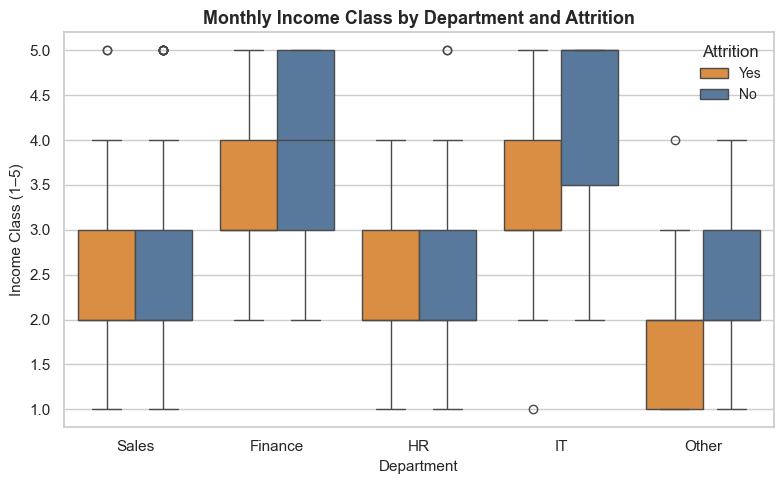

In [32]:
# --- Import thư viện ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Đọc dữ liệu ---
hr = pd.read_csv("hr_vn_sim.csv")

# --- Thiết lập style ---
sns.set(style="whitegrid")

# --- Đặt bảng màu nhất quán ---
custom_palette = {"No": "#4E79A7", "Yes": "#F28E2B"}

# --- Vẽ Boxplot ---
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="Department",
    y="IncomeClass",
    hue="Attrition",
    data=hr,
    palette=custom_palette
)

# --- Thêm tiêu đề và định dạng ---
plt.title("Monthly Income Class by Department and Attrition", fontsize=13, fontweight='bold')
plt.xlabel("Department", fontsize=11)
plt.ylabel("Income Class (1–5)", fontsize=11)
plt.legend(title="Attrition", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()


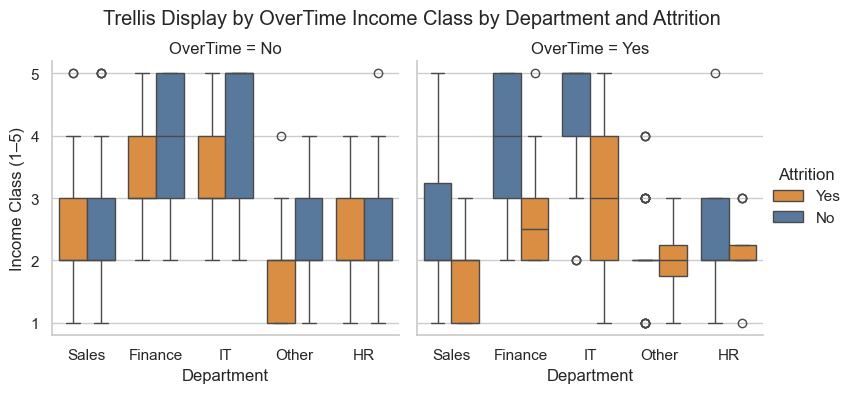

In [37]:
# --- Vẽ boxplot với hue + palette ---
g.map_dataframe(
    lambda data, color: sns.boxplot(
        x="Department",
        y="IncomeClass",
        hue="Attrition",
        data=data,
        palette=custom_palette,
        dodge=True
    )
)

# --- Thêm legend ---
g.add_legend(title="Attrition")

# --- Nhãn trục và tiêu đề ---
g.set_axis_labels("Department", "Income Class (1–5)")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Trellis Display by OverTime Income Class by Department and Attrition")

plt.show()

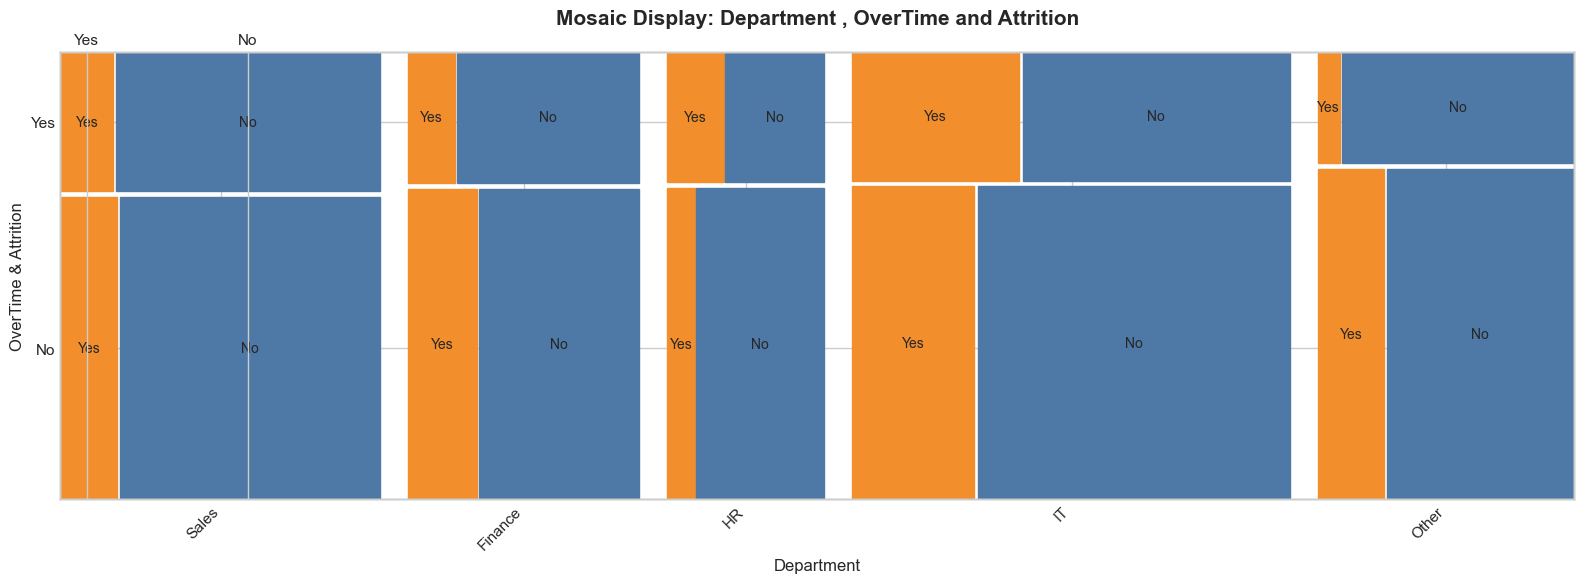

In [38]:
# --- Import thư viện ---
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# --- Đọc dữ liệu ---
hr = pd.read_csv("hr_vn_sim.csv")

# --- Hàm tô màu theo Attrition ---
def color_by_attrition(key):
    if key[2] == 'Yes':
        return {'color': '#F28E2B'}  # Cam nhạt
    else:
        return {'color': '#4E79A7'}  # Xanh lam

# --- Hàm hiển thị nhãn bên trong ô ---
def label_inside(key):
    # Chỉ hiển thị nhãn Attrition (Yes/No)
    if key[2] == 'Yes':
        return "Yes"
    elif key[2] == 'No':
        return "No"
    else:
        return ""

# --- Tạo figure ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(16, 6))

# --- Vẽ Mosaic Plot ---
props = lambda key: color_by_attrition(key)
mosaic(
    data=hr,
    index=['Department', 'OverTime', 'Attrition'],
    ax=ax,
    properties=props,
    gap=0.02,
    labelizer=label_inside
)

# --- Thiết lập tiêu đề và trục ---
ax.set_title(
    "Mosaic Display: Department , OverTime and Attrition",
    fontsize=15, fontweight='bold', pad=20
)
ax.set_xlabel("Department", fontsize=12)
ax.set_ylabel("OverTime & Attrition", fontsize=12)

# --- Gắn nhãn trục OverTime rõ ràng ---
for xtick in ax.get_xticklabels():
    xtick.set_rotation(45)
    xtick.set_ha('right')

# --- Chú giải màu ---
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#4E79A7', label='Attrition = No'),
    Patch(facecolor='#F28E2B', label='Attrition = Yes')
]
# ax.legend(handles=legend_elements, title="Attrition", loc='upper right')

plt.tight_layout()
plt.show()


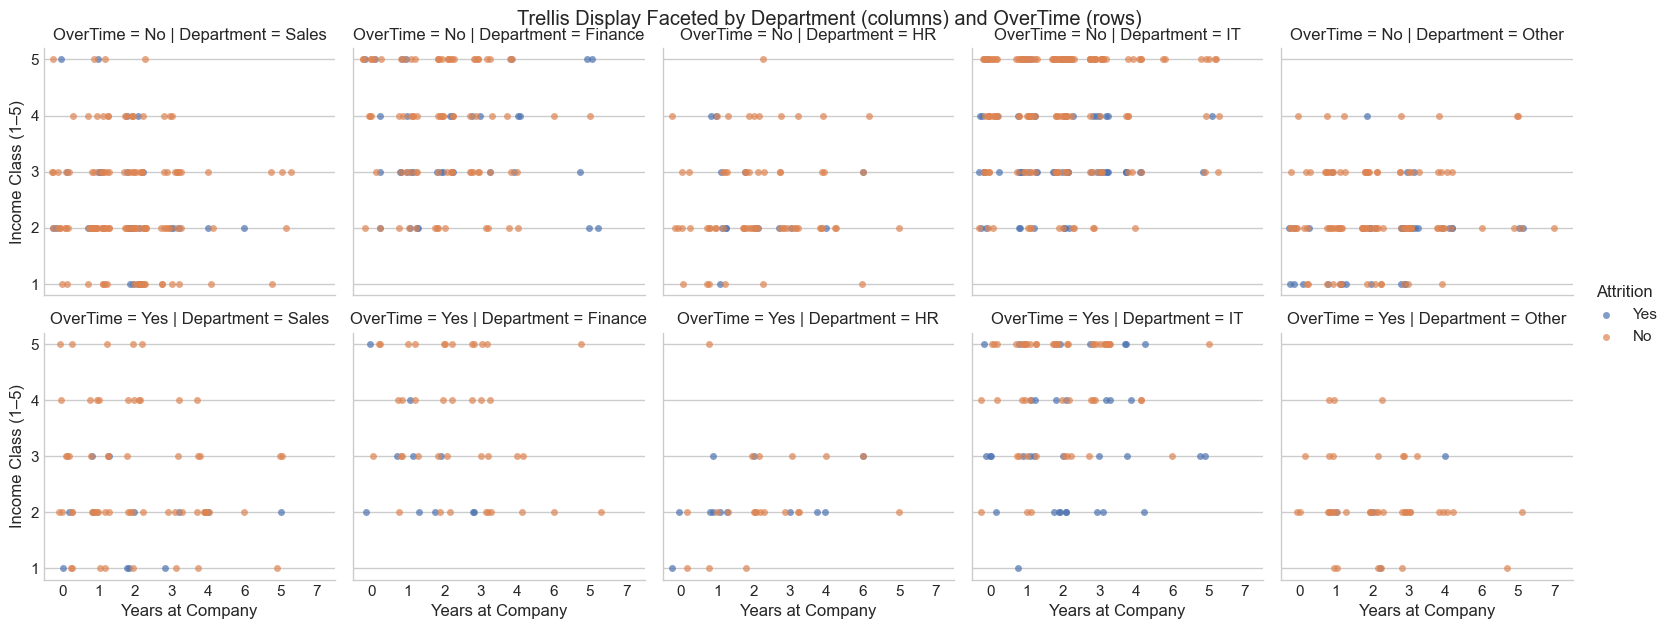

In [ ]:
g = sns.FacetGrid(hr, col="Department", row="OverTime", hue="Attrition", height=3.2)
g.map_dataframe(sns.stripplot, x="YearsAtCompany", y="IncomeClass", alpha=0.7, jitter=0.3)

g.add_legend()
g.set_axis_labels("Years at Company", "Income Class (1–5)")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Trellis Display Faceted by Department (columns) and OverTime (rows)")

plt.show()


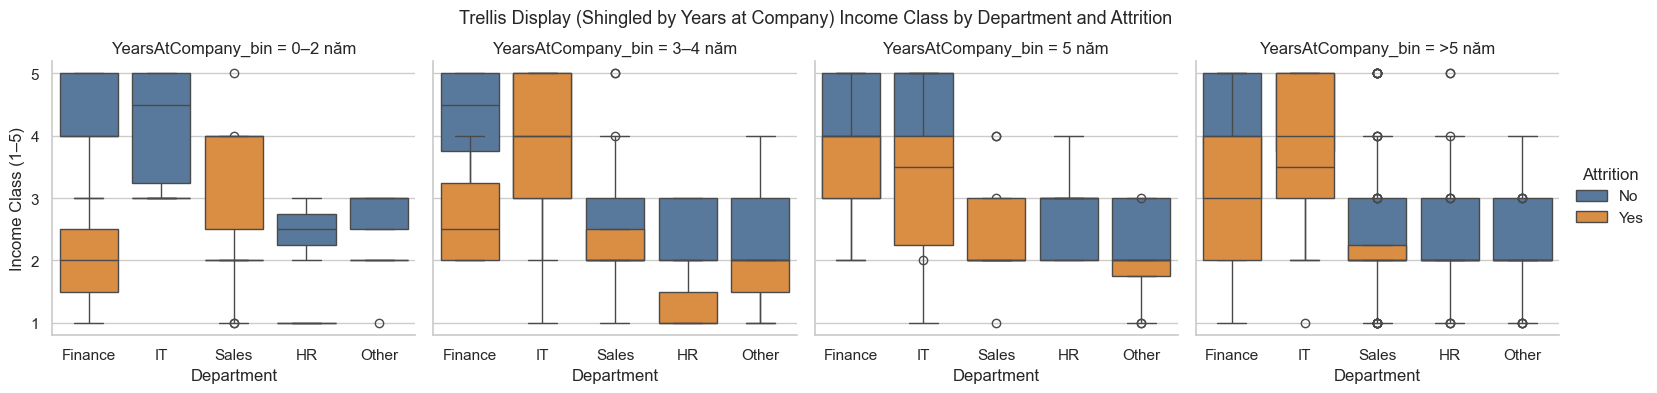

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Đọc dữ liệu ---
hr = pd.read_csv("hr_vn_sim.csv")

# --- Xác định max năm kinh nghiệm ---
max_years = hr["YearsAtCompany"].max()

# --- Tạo bins chuẩn theo 0–2, 3–4, 5, >5 ---
bins = [0, 3, 5, 6, max_years + 1]
labels = ["0–2 năm", "3–4 năm", "5 năm", ">5 năm"]

# --- Gán thành biến Shingle ---
hr["YearsAtCompany_bin"] = pd.cut(
    hr["YearsAtCompany"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# --- Thiết lập style ---
sns.set(style="whitegrid")
custom_palette = {"No": "#4E79A7", "Yes": "#F28E2B"}

# --- Tạo Trellis (FacetGrid) theo nhóm năm kinh nghiệm ---
g = sns.FacetGrid(hr, col="YearsAtCompany_bin", hue="Attrition", height=4, aspect=1)

# --- Vẽ boxplot ---
g.map_dataframe(
    lambda data, color, **kwargs: sns.boxplot(
        x="Department",
        y="IncomeClass",
        hue="Attrition",
        data=data,
        palette=custom_palette,
        dodge=True
    )
)

# --- Thêm legend ---
g.add_legend(title="Attrition")

# --- Nhãn trục và tiêu đề ---
g.set_axis_labels("Department", "Income Class (1–5)")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle(
    "Trellis Display (Shingled by Years at Company) Income Class by Department and Attrition",
    fontsize=13
)

plt.show()


In [69]:
import pandas as pd
import altair as alt

# --- Đọc dữ liệu ---
hr = pd.read_csv("hr_vn_sim.csv")

# --- Tạo nhóm năm làm việc (như trước) ---
bins = [0, 3, 5, 6, hr["YearsAtCompany"].max() + 1]
labels = ["0–2 năm", "3–4 năm", "5 năm", ">5 năm"]
hr["YearsAtCompany_bin"] = pd.cut(hr["YearsAtCompany"], bins=bins, labels=labels, include_lowest=True)

# --- Brush selection ---
brush = alt.selection_interval(encodings=['x', 'y'])

# --- Biểu đồ scatter chính ---
points = alt.Chart(hr).mark_circle(size=60).encode(
    x=alt.X('YearsAtCompany:Q', title='Years at Company'),
    y=alt.Y('IncomeClass:Q', title='Income Class (1–5)'),
    color=alt.condition(brush, 'Attrition:N', alt.value('lightgray'),
                        scale=alt.Scale(domain=['No','Yes'], range=['#4E79A7','#F28E2B'])),
    tooltip=['Department','Attrition','YearsAtCompany','IncomeClass']
).add_params(
    brush
).properties(
    width=400, height=300,
    title='🔍 Chọn vùng dữ liệu để xem boxplot chi tiết'
)

# --- Boxplot phản ứng với vùng chọn ---
box = alt.Chart(hr).mark_boxplot(size=50).encode(
    x=alt.X('Department:N', title='Department'),
    y=alt.Y('IncomeClass:Q', title='Income Class (1–5)'),
    color=alt.Color('Attrition:N', scale=alt.Scale(domain=['No','Yes'], range=['#4E79A7','#F28E2B']),
                    title='Attrition')
).transform_filter(
    brush
).properties(
    width=400, height=300,
    title='📊 Boxplot chi tiết cho vùng đã chọn'
)

# --- Kết hợp 2 biểu đồ ---
(points | box).resolve_scale(color='independent')



alt.HConcatChart(...)